<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">TITANIC DATASET ANALYSIS</h1>
    <br>
    <b>By Abdulhamid Abdulhamid</b>
</div>

<img src="https://storage.googleapis.com/kaggle-datasets-images/1893363/3100063/fa7569e349d653979306e888a99e560e/dataset-cover.jpg?t=2022-01-27-08-04-32" alt="image name" style="max-width: 100%;">

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#CONCLUSIONS">4. Model Selection And Evaluation</a></li>
<li><a href="#CONCLUSIONS">5. Conclusion</a></li>
</ul>

<div id='intro'></div>

## 1. Introduction
The Titanic Survival dataset is a widely-used dataset in the field of machine learning and data analysis. It contains information about the passengers on board the RMS Titanic, including whether they survived the shipwreck or not.In this notebook, we explore the data to get some valuabke insights. we also use some ML techniques to make predictions. 


### 1.1 Dataset description
The file `titanic.csv` was obtained from [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset) website. It consists of crude oil importation to the US from 2009 to 2024. The file has the following:

- `Passenger Information`: This section includes data about the passengers, such as their `names, gender, age, and passenger class (First, Second, or Third Class)`. This information provides insights into the demographics of the passengers on board.

- `Ticket Information`: Ticket information includes details about the passengers' `ticket numbers, fares paid, and cabin information.` This data can be used to analyze patterns related to ticket prices and cabin locations.

- `Travel Details`: Travel details provide information about the passengers' travel arrangements, such as the port of embarkation (Cherbourg, Queenstown, or Southampton) and the destination of the journey.

- `Family Relationships`: This section includes data about the family relationships of passengers, including the number of `siblings/spouses (SibSp) and the number of parents/children` (Parch) they were traveling with. These variables can be used to analyze the presence of family groups on board.

- `Survival Status`: The survival status field indicates whether a passenger survived the Titanic disaster or not. This binary variable is typically represented as `1 (survived) or 0 (did not survive)`. This field serves as the target variable for prediction models.

### 1.2 Importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, and sklearn

In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.3 Loading the dataset

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Check the shape of the dataset
print("There are", df.shape[0], "rows and ", df.shape[1], "columns in the dataset")

There are 891 rows and  12 columns in the dataset


<div id='wrangling'></div>

## 2. Data Wrangling
In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis. 

Thus we will address the following questions to ensure the quality and reliability of the dataset:
1. Check for missing values, duplicates, and outliers. These are all issues that may affect our analysis.

**1. Are there any missing values in the dataset, and if so, what is their extent and data type?**

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The missing values in Age would be replace by the median value while the embarked missing values with the mode.
The median is suitable to use because it is insensitive to outliers. the mode is the most frequent value or category in a dataset which makes it a good fit for this case.

In [6]:
#Replace missing age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Replace the missing embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

No more null values in `Age` and `Embarked` columns. However, the cabin column contains a lot of null values, so we can drop it entirely

In [8]:
# Drop the'Cabin' column as it has many missing values
df.drop(columns=['Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**2. Are there are any duplicate values?**

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

duplicate_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


No duplicates found

**3. Does the dataset require any feature engineering?**

Yes, the columns `SibSp`, `Parch`, simply indicates the size of the column, so we can create a column called the `FamilySize`. Also the Titles needs to be consistent


In [10]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify the titles
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Dr",
    "Rev": "Rev", "Col": "Officer", "Major": "Officer", "Mlle": "Miss",
    "Countess": "Royalty", "Ms": "Mrs", "Lady": "Royalty", "Jonkheer": "Royalty",
    "Don": "Royalty", "Dona": "Royalty", "Mme": "Mrs", "Capt": "Officer", "Sir": "Royalty"
}
df['Title'] = df['Title'].map(title_mapping)

<div id='eda'></div>

## 3. Exploratory Data Analysis

This section explores the dataset in order to extract useful information.

**1. What is the summary statistics of the dataset?**

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


**2. What is the survival rate by gender?**

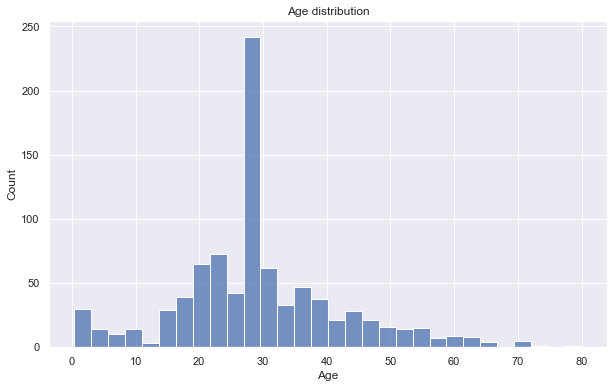

In [12]:
# Visualize survival rate by gender
plt.figure(figsize=(10, 6))
sns.histplot(x='Age',  data=df)
plt.title('Age distribution')
plt.show()

The distribution of age is nearly normal

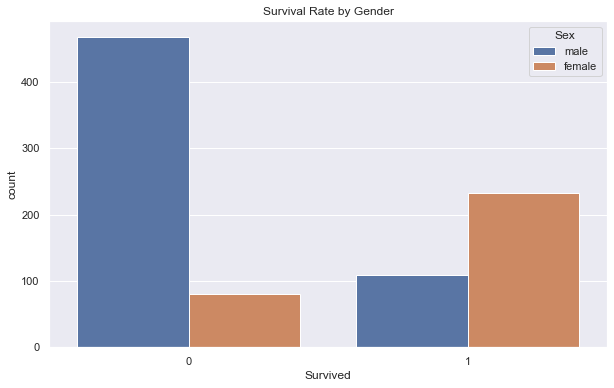

In [13]:
# Visualize survival rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender')
plt.show()

This shows that male passengers died far more than the female

**3. What is the survival rate by class?**

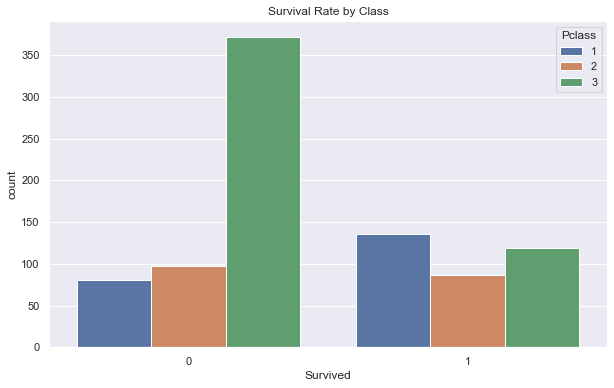

In [14]:
# Visualize survival rate by class
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Class')
plt.show()

## 4. Model Selection and Evaluation
In this section, we will evaluate the performance of several different regressors on our data. We will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

We will fit and evaluate the following regressors:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor
- K nearest neighbour, etc

We will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Title'] = label_encoder.fit_transform(df['Title'])

We seperate the dataset into features and the target variable

In [16]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked', 'Title']
target = 'Survived'


X = df[features]
y = df[target]

**Scaling the features**

Scaling is a preprocessing step that transforms the features of a dataset so that they have a similar scale and can improve the performance of some regression algorithms and facilitate comparison of the model's coefficients. In this project we will use standard scaler to standardize the features of the dataset.

In [17]:
# Normalize numerical features
scaler = StandardScaler()
X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

we split the dataset into training and testing set to better evaluate our model perfomance. The training set is used to train the model, while the testing set is used to evaluate the model's performance. This can help us determine how well the model generalizes to unseen data and can identify any issues with overfitting. In addition, random state shuffle the data before splitting it into the train and test sets, as this can help ensure that the data is representative of the overall population and not biased in any way.

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We define a function that will take multiple regressor as arguments and compare theor perfomance using the root mean square (RMSE) metric.

In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse


In [20]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)


In [21]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [22]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]


In [23]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,0.357743
1,Boosted Tree Regression,0.357918
2,Ridge Regression,0.363468
3,Linear Regression,0.363470
4,Polynomial Regression,0.376299
5,Neural Network Regression,0.389662
6,Support Vector Regression,0.394318
7,K-Nearest Neighbour Regression,0.398601
8,Decision Tree Regression,0.451586
9,Lasso Regression,0.493833


The best regressor among the ones listed, based on the RMSE (Root Mean Squared Error), is the Random Forest Regression with an RMSE of 0.353551. Lower RMSE values indicate better model performance in terms of predictive accuracy.

## 5. CONCLUSION

In conclusion, our analysis explore the survival rate of the passengers with low survival among men. Our random forest regressor outperform any other regression.